In [1]:
import parselmouth
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
import numpy as np

In [24]:
weak_dir = "/mnt/gyzhang/projects/fastspeech2-master/checkpoints/mix2_gvq_spkadv_105_pspk_mergedur_ar/test_pt_s2t_mix2_generated_210000_0-0-0-0-0-0-0-0_emoinfer/wavs/"
high_dir = "/mnt/gyzhang/projects/fastspeech2-master/checkpoints/mix2_gvq_spkadv_105_pspk_mergedur_ar/test_pt_s2t_mix2_generated_210000_1-1-1-1-1-1-1-1_emoinfer/wavs/"
# mid_dir = "/mnt/gyzhang/projects/fastspeech2-master/checkpoints/tgchildemotion_gvq_neu3_spkadv_con_105_pspk_en/test_pt_s2t_generated_200000_0.2-0.2-0.2-0.2-0.2-0.2_emoinfer/wavs"
mid_dir = "/mnt/gyzhang/projects/fastspeech2-master/checkpoints/mix2_gvq_spkadv_105_pspk_mergedur_ar/test_pt_s2t_mix2_generated_210000_"

In [25]:
spk_fn = "tgechildemotion"

In [38]:
wav_fn = "TGEmotionalchild_fear_211307"

In [39]:
weak_wav_file = f"{weak_dir}/{spk_fn}/{wav_fn}_{spk_fn}_generated_e2e.wav"

In [40]:
ipd.Audio(weak_wav_file)

In [41]:
snd = parselmouth.Sound(weak_wav_file)
pitch = snd.to_pitch(time_step=0.01, pitch_floor=75)
weak_pitch_values = pitch.selected_array['frequency']
pitch_frame_number = pitch.get_number_of_frames()
intensity = snd.to_intensity(minimum_pitch=75, time_step=0.01)
weak_intensity = intensity.as_array()[0,:]

In [42]:
mid_wav_file = f"{mid_dir}/{spk_fn}/{wav_fn}_{spk_fn}_generated_e2e.wav"



In [43]:
ipd.Audio(mid_wav_file)

In [44]:
snd = parselmouth.Sound(mid_wav_file)
pitch = snd.to_pitch(time_step=0.01, pitch_floor=75)
mid_pitch_values = pitch.selected_array['frequency']
pitch_frame_number = pitch.get_number_of_frames()
intensity = snd.to_intensity(minimum_pitch=75, time_step=0.01)
mid_intensity = intensity.as_array()[0,:]

In [45]:
high_wav_file = f"{high_dir}/{spk_fn}/{wav_fn}_{spk_fn}_generated_e2e.wav"

In [46]:
ipd.Audio(high_wav_file)

In [47]:
snd = parselmouth.Sound(high_wav_file)
pitch = snd.to_pitch(time_step=0.01, pitch_floor=75)
high_pitch_values = pitch.selected_array['frequency']
pitch_frame_number = pitch.get_number_of_frames()
intensity = snd.to_intensity(minimum_pitch=75, time_step=0.01)
high_intensity = intensity.as_array()[0,:]

Text(0, 0.5, 'Frequency(Hz)')

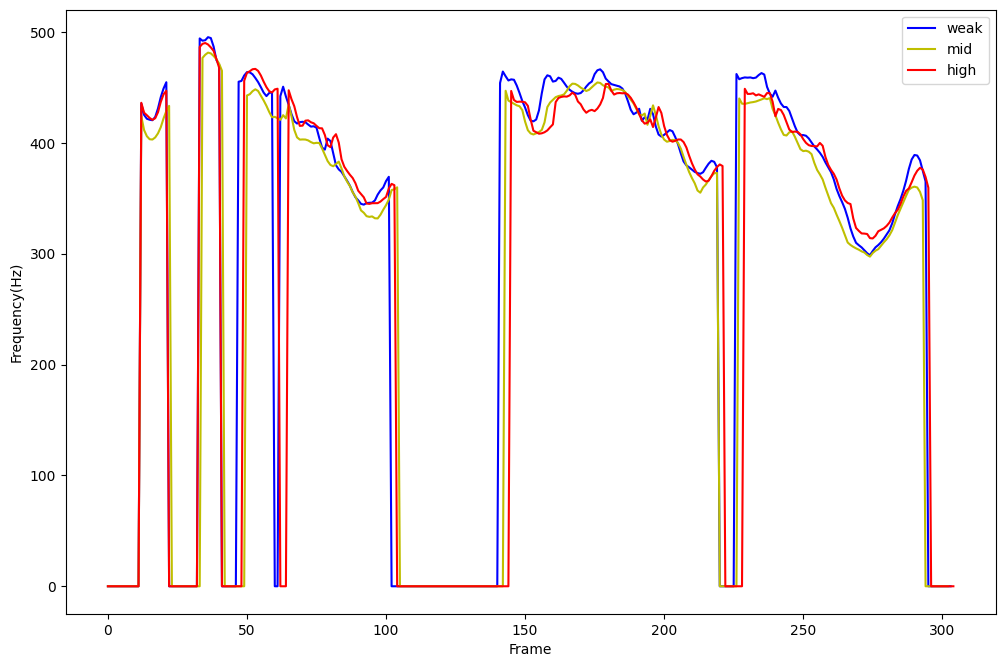

In [48]:
plt.plot(weak_pitch_values, 'b-', label="weak")
plt.plot(mid_pitch_values, 'y-', label="mid")
plt.plot(high_pitch_values, 'r-', label="high")
plt.legend(loc="upper right")
plt.xlabel("Frame")
plt.ylabel("Frequency(Hz)")


Text(0, 0.5, 'Intensity(dB)')

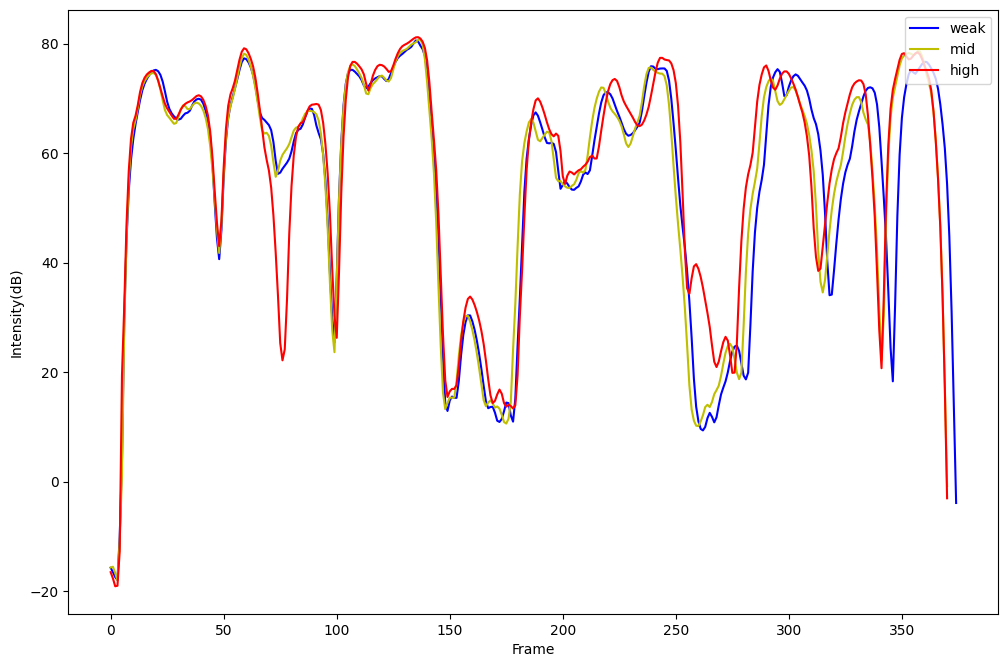

In [37]:
plt.plot(weak_intensity, 'b-', label="weak")
plt.plot(mid_intensity, 'y-', label="mid")
plt.plot(high_intensity, 'r-', label="high")
plt.legend(loc="upper right")
plt.xlabel("Frame")
plt.ylabel("Intensity(dB)")

In [94]:
intensity.as_array()[0,:].shape

(511,)